<a href="https://colab.research.google.com/github/rahulkashyap14298/AI-Project/blob/master/Traning_and%20testing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required classes

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from fastai.vision import *
from fastai.metrics import error_rate

Uploading kaggle json file

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import pandas as pd
import os
import shutil
kag = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = kag.iloc[0][0]
os.environ['KAGGLE_KEY'] = kag.iloc[0][1]

downloading dataset from kaggle

In [4]:
!kaggle datasets download -d rrishabhgupta/VehicleBase

 89% 45.0M/50.3M [00:00<00:00, 68.5MB/s]
100% 50.3M/50.3M [00:00<00:00, 73.7MB/s]


Unzipping

In [5]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: my_data/bicycle/00000309.jpg  
  inflating: my_data/bicycle/00000310.jpg  
  inflating: my_data/bicycle/00000311.jpg  
  inflating: my_data/bicycle/00000312.jpg  
  inflating: my_data/bicycle/00000313.jpg  
  inflating: my_data/bicycle/00000314.jpg  
  inflating: my_data/bicycle/00000315.jpg  
  inflating: my_data/bicycle/00000316.jpg  
  inflating: my_data/bicycle/00000317.jpg  
  inflating: my_data/bicycle/00000318.jpg  
  inflating: my_data/bicycle/00000319.jpg  
  inflating: my_data/bicycle/00000320.jpg  
  inflating: my_data/bicycle/00000321.jpg  
  inflating: my_data/bicycle/00000322.jpg  
  inflating: my_data/bicycle/00000323.jpg  
  inflating: my_data/bicycle/00000324.jpg  
  inflating: my_data/bicycle/00000325.jpg  
  inflating: my_data/bicycle/00000326.jpg  
  inflating: my_data/bicycle/00000327.jpg  
  inflating: my_data/bicycle/00000328.jpg  
  inflating: my_data/bicycle/00000329.jpg  
  inflating: my_data/bicy

In [6]:
np.random.seed(42)

flipping some images

In [7]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/my_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

showing images randomly

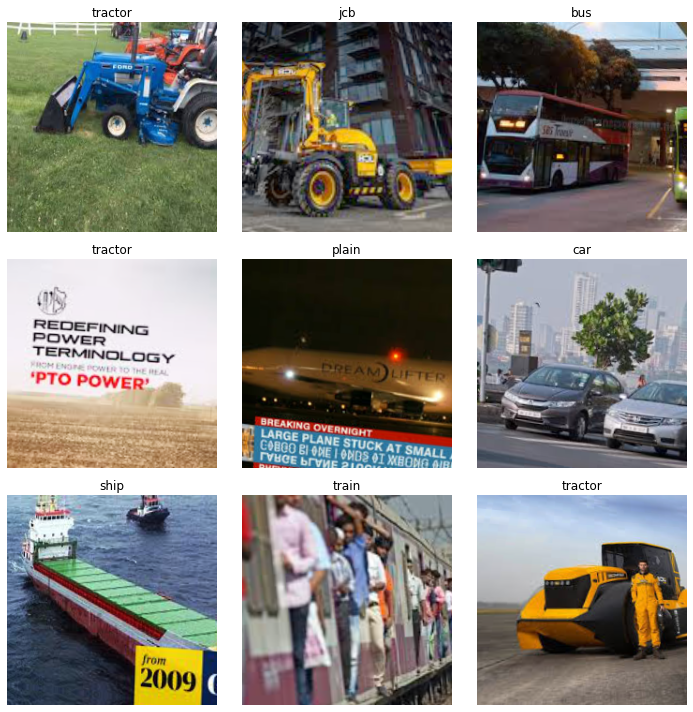

In [9]:
data.show_batch(rows=3,figsize=(10,10))

passing required arguements in cnn_learner

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Training our dataset

In [11]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.047193,0.649043,0.847071,00:48
1,0.801678,0.599680,0.838133,00:47
2,0.627874,0.476444,0.851043,00:47
3,0.487765,0.449462,0.856008,00:47
4,0.409830,0.461832,0.862959,00:48
5,0.326729,0.435525,0.866931,00:47
6,0.292889,0.426859,0.859980,00:47
7,0.256199,0.431883,0.862959,00:48


In [12]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [13]:
learn.save("/content/stage-1")

In [14]:
learn.load("/content")

Learner(data=ImageDataBunch;

Train: LabelList (4032 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bus,bus,bus,bus,bus
Path: /content/my_data;

Valid: LabelList (1007 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ship,car,car,car,car
Path: /content/my_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [16]:
learn.export("/content/export.pkl")


In [17]:
path="/content"
predictor = load_learner(path)

In [18]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

In [20]:
images_for_test=os.listdir("/content/training_data/")

plain


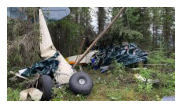

In [21]:
idx = 0
print(my_predictor("/content/training_data/"+images_for_test[idx]))
img = open_image("/content/training_data/"+images_for_test[idx])
img.show()

In [22]:
import cv2
test_files=os.listdir("/content/training_data")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/training_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [23]:
%cd "test_result"
!ffmpeg -framerate 2 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../result_file.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [24]:
!pip install -U kora
from kora.drive import upload_public

     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 


In [25]:
url = upload_public('result_file.mp4')
print(url)

https://drive.google.com/uc?id=1kcNS8J0jqKmqxvEd0zkGxBbnOEJCIgOs


In [26]:
from IPython.display import HTML
HTML(f"""<video src={url}  width=320 controls/>""")